In [115]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing import sequence
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, LSTM, Activation, Embedding, Reshape, Dropout
import tensorflow as tf
from sklearn.model_selection import train_test_split
from keras.regularizers import l2

In [116]:
# set GPU memory
gpu_options = tf.GPUOptions(allow_growth=True)
sess = tf.Session(config=tf.ConfigProto(gpu_options=gpu_options))

In [117]:
num_of_ball = 15

In [118]:
# read dataset
dataset_path = '/home/lab606a/ML/trajectories/not_fixed/classification/datasets/dataset20200311_' + str(num_of_ball) + 'balls.csv'
dataset = pd.read_csv(dataset_path, header=None)
dataset = np.array(dataset)
print(dataset.shape)

(4000, 46)


In [119]:
X = dataset[:,1:]
X = X.astype('float32')
Y = dataset[:,0]
Y = Y.astype('int')
Y = np_utils.to_categorical(Y, 4)

In [120]:
x_train, x_val, y_train, y_val = train_test_split(X, Y, test_size=0.25, shuffle=True)

In [121]:
print(x_train.shape)
print(x_val.shape)
print(y_train.shape)
print(y_val.shape)

(3000, 45)
(1000, 45)
(3000, 4)
(1000, 4)


In [122]:
# set x train with embedding
#x_train = dataset[:,1:]
#x_train = x_train.astype('float32')
#print(x_train.shape)

In [123]:
#val = 

In [124]:
#x_val = dataset[3500:,1:]
#x_val = x_val.astype('float32')
#print(x_val.shape)

In [125]:
# set x train without embedding
#x_train = dataset[:,1:]
#x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)
#row = int(x_train.shape[1]/3)
#col = 3
#x_train = x_train.reshape(x_train.shape[0],row,col)
#x_train = x_train.astype('float32')

In [126]:
#set y train
#y_train = dataset[:,0]
#y_train = y_train.astype('int')
#print(y_train.shape)

In [127]:
# 4 direction balls
n_classes = 4

# onehot encoding
#y_train = np_utils.to_categorical(y_train, n_classes)
#print(y_train.shape)

In [128]:
#y_val = dataset[3500:,0]
#y_val = y_val.astype('int')
#print(y_val.shape)
#y_val = np_utils.to_categorical(y_val, n_classes)
#print(y_val.shape)

In [129]:
maxlen = x_train.shape[1]
rowsss = int(maxlen/3)
output_dim = 3

In [130]:
# define model
model = Sequential()
model.add(Embedding(1000, output_dim, input_length=maxlen))
model.add(Reshape((rowsss,3*output_dim)))
#model.add(LSTM(units=512, activation='tanh', input_shape=(x_train.shape[1],x_train.shape[2]) , unroll=True, return_sequences=True))
#model.add(LSTM(units=16, activation='tanh', unroll=True, return_sequences=True))
#model.add(LSTM(units=2048, activation='tanh', unroll=True, return_sequences=True))
#model.add(LSTM(units=1536, activation='tanh', unroll=True, return_sequences=True))
#model.add(LSTM(units=1024, activation='tanh', unroll=True, return_sequences=True))
model.add(Dropout(0.4))
model.add(LSTM(units=512, activation='tanh', unroll=True, return_sequences=True, recurrent_regularizer=l2(0.01)))
model.add(Dropout(0.25))
#model.add(LSTM(units=256, activation='tanh', unroll=True, return_sequences=True))
model.add(LSTM(units=256, activation='tanh', unroll=True, return_sequences=True, recurrent_regularizer=l2(0.01)))
model.add(Dropout(0.25))
model.add(LSTM(units=128, activation='tanh', unroll=True, return_sequences=True, recurrent_regularizer=l2(0.01)))
model.add(Dropout(0.25))
model.add(LSTM(units=64, activation='tanh', unroll=True, return_sequences=True, recurrent_regularizer=l2(0.01)))
model.add(Dropout(0.25))
model.add(LSTM(units=32, activation='tanh', unroll=True, return_sequences=True, recurrent_regularizer=l2(0.01)))
model.add(Dropout(0.25))
model.add(LSTM(units=16, activation='tanh', unroll=True, return_sequences=True, recurrent_regularizer=l2(0.01)))
model.add(Dropout(0.25))
model.add(LSTM(units=8, activation='tanh', unroll=True))
model.add(Dense(units=n_classes, activation='softmax'))

# compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [131]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 45, 3)             3000      
_________________________________________________________________
reshape_5 (Reshape)          (None, 15, 9)             0         
_________________________________________________________________
dropout_29 (Dropout)         (None, 15, 9)             0         
_________________________________________________________________
lstm_29 (LSTM)               (None, 15, 512)           1069056   
_________________________________________________________________
dropout_30 (Dropout)         (None, 15, 512)           0         
_________________________________________________________________
lstm_30 (LSTM)               (None, 15, 256)           787456    
_________________________________________________________________
dropout_31 (Dropout)         (None, 15, 256)           0         
__________

In [141]:
# training batch=400, epoch=500, batch=300 best
batch_size = 300
training_iters = 500
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=training_iters, shuffle=True, validation_data=(x_val,y_val))

Train on 3000 samples, validate on 1000 samples
Epoch 1/500
3000/3000 [==============================] - 1s 270us/step - loss: 0.1993 - acc: 0.9390 - val_loss: 0.1607 - val_acc: 0.9520
Epoch 2/500
3000/3000 [==============================] - 1s 266us/step - loss: 0.1741 - acc: 0.9517 - val_loss: 0.1616 - val_acc: 0.9510
Epoch 3/500
3000/3000 [==============================] - 1s 264us/step - loss: 0.2060 - acc: 0.9320 - val_loss: 0.1796 - val_acc: 0.9510
Epoch 4/500
3000/3000 [==============================] - 1s 264us/step - loss: 0.1868 - acc: 0.9453 - val_loss: 0.1675 - val_acc: 0.9500
Epoch 5/500
3000/3000 [==============================] - 1s 264us/step - loss: 0.2008 - acc: 0.9410 - val_loss: 0.1868 - val_acc: 0.9430
Epoch 6/500
3000/3000 [==============================] - 1s 265us/step - loss: 0.2213 - acc: 0.9327 - val_loss: 0.2322 - val_acc: 0.9320
Epoch 7/500
3000/3000 [==============================] - 1s 264us/step - loss: 0.2265 - acc: 0.9273 - val_loss: 0.1737 - val_acc: 

3000/3000 [==============================] - 1s 264us/step - loss: 0.1630 - acc: 0.9510 - val_loss: 0.1886 - val_acc: 0.9440
Epoch 61/500
3000/3000 [==============================] - 1s 262us/step - loss: 0.1801 - acc: 0.9437 - val_loss: 0.2093 - val_acc: 0.9350
Epoch 62/500
3000/3000 [==============================] - 1s 263us/step - loss: 0.1817 - acc: 0.9430 - val_loss: 0.1691 - val_acc: 0.9480
Epoch 63/500
3000/3000 [==============================] - 1s 263us/step - loss: 0.1624 - acc: 0.9493 - val_loss: 0.1707 - val_acc: 0.9450
Epoch 64/500
3000/3000 [==============================] - 1s 264us/step - loss: 0.1952 - acc: 0.9423 - val_loss: 0.1894 - val_acc: 0.9390
Epoch 65/500
3000/3000 [==============================] - 1s 263us/step - loss: 0.1742 - acc: 0.9473 - val_loss: 0.1641 - val_acc: 0.9530
Epoch 66/500
3000/3000 [==============================] - 1s 263us/step - loss: 0.1758 - acc: 0.9467 - val_loss: 0.2132 - val_acc: 0.9350
Epoch 67/500
3000/3000 [=======================

3000/3000 [==============================] - 1s 265us/step - loss: 0.1620 - acc: 0.9550 - val_loss: 0.2115 - val_acc: 0.9330
Epoch 120/500
3000/3000 [==============================] - 1s 265us/step - loss: 0.1883 - acc: 0.9443 - val_loss: 0.1719 - val_acc: 0.9520
Epoch 121/500
3000/3000 [==============================] - 1s 265us/step - loss: 0.1611 - acc: 0.9533 - val_loss: 0.1794 - val_acc: 0.9420
Epoch 122/500
3000/3000 [==============================] - 1s 265us/step - loss: 0.1561 - acc: 0.9520 - val_loss: 0.1557 - val_acc: 0.9520
Epoch 123/500
3000/3000 [==============================] - 1s 265us/step - loss: 0.1521 - acc: 0.9547 - val_loss: 0.1864 - val_acc: 0.9400
Epoch 124/500
3000/3000 [==============================] - 1s 265us/step - loss: 0.1396 - acc: 0.9590 - val_loss: 0.1693 - val_acc: 0.9480
Epoch 125/500
3000/3000 [==============================] - 1s 266us/step - loss: 0.1431 - acc: 0.9557 - val_loss: 0.1726 - val_acc: 0.9570
Epoch 126/500
3000/3000 [================

3000/3000 [==============================] - 1s 263us/step - loss: 0.1659 - acc: 0.9523 - val_loss: 0.1676 - val_acc: 0.9500
Epoch 179/500
3000/3000 [==============================] - 1s 264us/step - loss: 0.1580 - acc: 0.9543 - val_loss: 0.1981 - val_acc: 0.9460
Epoch 180/500
3000/3000 [==============================] - 1s 263us/step - loss: 0.1397 - acc: 0.9590 - val_loss: 0.1770 - val_acc: 0.9440
Epoch 181/500
3000/3000 [==============================] - 1s 263us/step - loss: 0.1410 - acc: 0.9627 - val_loss: 0.1764 - val_acc: 0.9510
Epoch 182/500
3000/3000 [==============================] - 1s 264us/step - loss: 0.1398 - acc: 0.9597 - val_loss: 0.2148 - val_acc: 0.9340
Epoch 183/500
3000/3000 [==============================] - 1s 263us/step - loss: 0.1313 - acc: 0.9617 - val_loss: 0.1592 - val_acc: 0.9550
Epoch 184/500
3000/3000 [==============================] - 1s 263us/step - loss: 0.1281 - acc: 0.9610 - val_loss: 0.1953 - val_acc: 0.9400
Epoch 185/500
3000/3000 [================

3000/3000 [==============================] - 1s 264us/step - loss: 0.1146 - acc: 0.9663 - val_loss: 0.1929 - val_acc: 0.9470
Epoch 238/500
3000/3000 [==============================] - 1s 264us/step - loss: 0.1266 - acc: 0.9620 - val_loss: 0.2048 - val_acc: 0.9380
Epoch 239/500
3000/3000 [==============================] - 1s 263us/step - loss: 0.1259 - acc: 0.9623 - val_loss: 0.1979 - val_acc: 0.9380
Epoch 240/500
3000/3000 [==============================] - 1s 264us/step - loss: 0.1182 - acc: 0.9633 - val_loss: 0.1781 - val_acc: 0.9480
Epoch 241/500
3000/3000 [==============================] - 1s 265us/step - loss: 0.1371 - acc: 0.9590 - val_loss: 0.2149 - val_acc: 0.9310
Epoch 242/500
3000/3000 [==============================] - 1s 264us/step - loss: 0.1222 - acc: 0.9663 - val_loss: 0.1870 - val_acc: 0.9490
Epoch 243/500
3000/3000 [==============================] - 1s 262us/step - loss: 0.1181 - acc: 0.9647 - val_loss: 0.2254 - val_acc: 0.9360
Epoch 244/500
3000/3000 [================

3000/3000 [==============================] - 1s 262us/step - loss: 0.1243 - acc: 0.9647 - val_loss: 0.2079 - val_acc: 0.9360
Epoch 297/500
3000/3000 [==============================] - 1s 264us/step - loss: 0.1006 - acc: 0.9713 - val_loss: 0.1994 - val_acc: 0.9480
Epoch 298/500
3000/3000 [==============================] - 1s 263us/step - loss: 0.1273 - acc: 0.9663 - val_loss: 0.2110 - val_acc: 0.9370
Epoch 299/500
3000/3000 [==============================] - 1s 263us/step - loss: 0.1187 - acc: 0.9663 - val_loss: 0.1961 - val_acc: 0.9460
Epoch 300/500
3000/3000 [==============================] - 1s 263us/step - loss: 0.1268 - acc: 0.9660 - val_loss: 0.2049 - val_acc: 0.9420
Epoch 301/500
3000/3000 [==============================] - 1s 263us/step - loss: 0.1196 - acc: 0.9643 - val_loss: 0.1829 - val_acc: 0.9470
Epoch 302/500
3000/3000 [==============================] - 1s 263us/step - loss: 0.1018 - acc: 0.9707 - val_loss: 0.2041 - val_acc: 0.9380
Epoch 303/500
3000/3000 [================

3000/3000 [==============================] - 1s 263us/step - loss: 0.0962 - acc: 0.9740 - val_loss: 0.2056 - val_acc: 0.9350
Epoch 356/500
3000/3000 [==============================] - 1s 263us/step - loss: 0.0947 - acc: 0.9743 - val_loss: 0.2037 - val_acc: 0.9460
Epoch 357/500
3000/3000 [==============================] - 1s 263us/step - loss: 0.1106 - acc: 0.9673 - val_loss: 0.2225 - val_acc: 0.9350
Epoch 358/500
3000/3000 [==============================] - 1s 264us/step - loss: 0.1043 - acc: 0.9727 - val_loss: 0.2027 - val_acc: 0.9440
Epoch 359/500
3000/3000 [==============================] - 1s 264us/step - loss: 0.1067 - acc: 0.9680 - val_loss: 0.2064 - val_acc: 0.9410
Epoch 360/500
3000/3000 [==============================] - 1s 264us/step - loss: 0.1216 - acc: 0.9657 - val_loss: 0.2434 - val_acc: 0.9320
Epoch 361/500
3000/3000 [==============================] - 1s 263us/step - loss: 0.1069 - acc: 0.9707 - val_loss: 0.1925 - val_acc: 0.9470
Epoch 362/500
3000/3000 [================

3000/3000 [==============================] - 1s 264us/step - loss: 0.0964 - acc: 0.9733 - val_loss: 0.2053 - val_acc: 0.9470
Epoch 415/500
3000/3000 [==============================] - 1s 264us/step - loss: 0.0859 - acc: 0.9780 - val_loss: 0.2445 - val_acc: 0.9220
Epoch 416/500
3000/3000 [==============================] - 1s 264us/step - loss: 0.0863 - acc: 0.9740 - val_loss: 0.2415 - val_acc: 0.9350
Epoch 417/500
3000/3000 [==============================] - 1s 262us/step - loss: 0.0988 - acc: 0.9730 - val_loss: 0.2134 - val_acc: 0.9350
Epoch 418/500
3000/3000 [==============================] - 1s 264us/step - loss: 0.0929 - acc: 0.9757 - val_loss: 0.2525 - val_acc: 0.9280
Epoch 419/500
3000/3000 [==============================] - 1s 264us/step - loss: 0.0772 - acc: 0.9797 - val_loss: 0.1973 - val_acc: 0.9430
Epoch 420/500
3000/3000 [==============================] - 1s 264us/step - loss: 0.0867 - acc: 0.9770 - val_loss: 0.1717 - val_acc: 0.9450
Epoch 421/500
3000/3000 [================

3000/3000 [==============================] - 1s 263us/step - loss: 0.0921 - acc: 0.9750 - val_loss: 0.2215 - val_acc: 0.9400
Epoch 474/500
3000/3000 [==============================] - 1s 264us/step - loss: 0.0802 - acc: 0.9787 - val_loss: 0.2216 - val_acc: 0.9360
Epoch 475/500
3000/3000 [==============================] - 1s 264us/step - loss: 0.1099 - acc: 0.9740 - val_loss: 0.2023 - val_acc: 0.9450
Epoch 476/500
3000/3000 [==============================] - 1s 264us/step - loss: 0.0984 - acc: 0.9733 - val_loss: 0.2830 - val_acc: 0.9240
Epoch 477/500
3000/3000 [==============================] - 1s 263us/step - loss: 0.1097 - acc: 0.9717 - val_loss: 0.2335 - val_acc: 0.9310
Epoch 478/500
3000/3000 [==============================] - 1s 264us/step - loss: 0.0890 - acc: 0.9763 - val_loss: 0.2314 - val_acc: 0.9350
Epoch 479/500
3000/3000 [==============================] - 1s 264us/step - loss: 0.0837 - acc: 0.9793 - val_loss: 0.2375 - val_acc: 0.9310
Epoch 480/500
3000/3000 [================

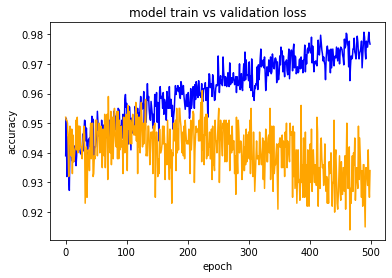

In [143]:
#train[str(i)] = history.history['loss']
#val[str(i)] = history.history['val_loss']

# plot train and validation loss across multiple runs
plt.plot(history.history['acc'], color='blue', label='train')
plt.plot(history.history['val_acc'], color='orange', label='validation')
plt.title('model train vs validation loss')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

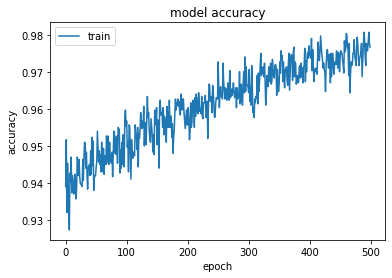

In [144]:
# plot accuracy history
# summarize history for accuracy
plt.plot(history.history['acc'])
#plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

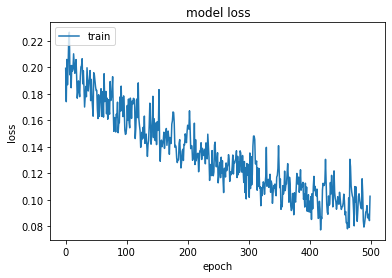

In [145]:
# plot loss history
# summarize history for loss
plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [146]:
def cal_acc(num, direction, speed):
    num1 = str(num)
    num = int(num)
    speed = str(speed)
    file = '/home/lab606a/ML/trajectories/not_fixed/classification/test/' + num1 + 'balls/' + direction + '_speed' +  speed + '_20200304_test.csv'
    test_up2 = pd.read_csv(file, header=None)
    test_up2 = np.array(test_up2)
    #test_up2 = test_up2.astype('int')
    #print(test_up2.shape)
    #test_up2 = test_up2.reshape(test_up2.shape[0],num,3)
    cnt = np.array([0,0,0,0])
    pred = model.predict(test_up2)
    for i in range (pred.shape[0]):
        for j in range (4):
            if max(pred[i,:]) == pred[i,j]:
                cnt[j] += 1
    #print(cnt)
    return cnt

In [147]:
#num_of_ball = str(num_of_ball)

In [148]:
top5_accuracy = cal_acc(num_of_ball, 'top', 5)
top6_accuracy = cal_acc(num_of_ball, 'top', 6)
left5_accuracy = cal_acc(num_of_ball, 'left', 5)
left6_accuracy = cal_acc(num_of_ball, 'left', 6)
right5_accuracy = cal_acc(num_of_ball, 'right', 5)
right6_accuracy = cal_acc(num_of_ball, 'right', 6)
back5_accuracy = cal_acc(num_of_ball, 'back', 5)
back6_accuracy = cal_acc(num_of_ball, 'back', 6)

In [149]:
accuarcy = np.zeros([8,4])
accuarcy[0,:] = top5_accuracy
accuarcy[1,:] = top6_accuracy
accuarcy[2,:] = left5_accuracy
accuarcy[3,:] = left6_accuracy
accuarcy[4,:] = right5_accuracy
accuarcy[5,:] = right6_accuracy
accuarcy[6,:] = back5_accuracy
accuarcy[7,:] = back6_accuracy

In [150]:
accuarcy

array([[203.,   5.,  40.,   2.],
       [234.,   0.,  16.,   0.],
       [  4., 217.,  19.,  10.],
       [  7., 217.,  10.,  16.],
       [ 29.,   6., 206.,   9.],
       [ 28.,   3., 213.,   6.],
       [  0.,   8.,  14., 228.],
       [  2.,   1.,  15., 232.]])